<a href="https://colab.research.google.com/github/khalilullahalfaath/Project_Based_ML/blob/main/ML_Project_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama kelompok:
*   Naufal Abdurrahman Burhani
*   Hilman Taris Muttaqin
*   Muhammad Erlangga Arsadi
*   Khalilullah Al Faath





==========================================================

NIM terkecil: 1301204008

1301204008 % 4 = 0

Ketentuan tubes:

Tugas tipe 0: Bagging dengan regresi (dataset: autos MPG)


==========================================================



# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# library untuk preprocessing
# Untuk data imputation
from sklearn.impute import SimpleImputer 
# untuk trasformasi
from sklearn import preprocessing
# untuk split dataset
from sklearn.model_selection import train_test_split
# untuk model
from sklearn.ensemble import BaggingRegressor

# Import dataset

In [2]:
df = pd.read_csv("https://github.com/khalilullahalfaath/Project_Based_ML/blob/fa1ad703e8ad687e46747bbfbd8e5cef6270aa11/autos_mpg.csv?raw=true")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Attribute information
1.	mpg: continuous (target attribute)
2.	cylinders: multi-valued discrete
3.	displacement: continuous
4.	horsepower: continuous
5.	weight: continuous
6.	acceleration: continuous
7.	model year: multi-valued discrete
8.	origin: multi-valued discrete
9.	car name: string (unique for each instance)


Proses Data Science:



*   Data Preparation
*   Data Cleansing
*   Exploratory Data Analysis
*   Feature Engineering
*   Modeling
*   Evaluation
*   Deployment












## Dimensi dataset

In [4]:
N, K = df.shape
print("Jumlah baris = ",N)
print("Jumlah kolom = ",K)

Jumlah baris =  398
Jumlah kolom =  9


## Lima data terawal

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Lima data terakhir

In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## Lima data random

In [7]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
124,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega
125,20.0,6,198.0,95,3102,16.5,74,1,plymouth duster
381,36.0,4,107.0,75,2205,14.5,82,3,honda accord
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
179,22.0,4,121.0,98,2945,14.5,75,2,volvo 244dl


## Deskripsi terkait dataset

In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Tipe setiap kolom dari dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Dapat dilihat bahwa dalam kolom 'horsepower' yang seharusnya numerik, malah bertipe object. Menandakan bahwa ada data yang null dengan '?'



## Memeriksa data null

In [10]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [11]:
df.columns[df.isin(['?']).any()]

Index(['horsepower'], dtype='object')

In [12]:
df.replace("?",np.nan,inplace=True)

In [13]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


data NULL ada di kolom horsepower

### Menentukan angka skewness dari data

Menurut sumber https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/,
1.   Mean-It is preferred if data is numeric and not skewed.
2.   Median-It is preferred if data is numeric and skewed.
3.   Mode-It is preferred if the data is a string(object) or numeric.

In [14]:
temp_df = df['horsepower'].copy().dropna().astype(int).to_numpy()

In [15]:
temp_df

array([130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150,
       225,  95,  95,  97,  85,  88,  46,  87,  90,  95, 113,  90, 215,
       200, 210, 193,  88,  90,  95, 100, 105, 100,  88, 100, 165, 175,
       153, 150, 180, 170, 175, 110,  72, 100,  88,  86,  90,  70,  76,
        65,  69,  60,  70,  95,  80,  54,  90,  86, 165, 175, 150, 153,
       150, 208, 155, 160, 190,  97, 150, 130, 140, 150, 112,  76,  87,
        69,  86,  92,  97,  80,  88, 175, 150, 145, 137, 150, 198, 150,
       158, 150, 215, 225, 175, 105, 100, 100,  88,  95,  46, 150, 167,
       170, 180, 100,  88,  72,  94,  90,  85, 107,  90, 145, 230,  49,
        75,  91, 112, 150, 110, 122, 180,  95, 100, 100,  67,  80,  65,
        75, 100, 110, 105, 140, 150, 150, 140, 150,  83,  67,  78,  52,
        61,  75,  75,  75,  97,  93,  67,  95, 105,  72,  72, 170, 145,
       150, 148, 110, 105, 110,  95, 110, 110, 129,  75,  83, 100,  78,
        96,  71,  97,  97,  70,  90,  95,  88,  98, 115,  53,  8

In [16]:
print(skew(temp_df))

1.0831611646869432


dapat dilihat bahwa colomn horsepower sangat condong ke arah kanan sehingga bagusnya menggunakan imputer dengan strategi median

## Handling data NULL

In [17]:
col_num = ['horsepower']

In [18]:
df = df.astype({'horsepower': 'float'})

In [19]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [21]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [22]:
df[col_num]

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [23]:
imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputer.fit(df[col_num])
df[col_num] = imputer.transform(df[col_num])

In [24]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


data NULL sudah berhasil dihilangkan

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## Mengecek duplikasi data

In [26]:
bool_series = df.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool


In [27]:
print(type(bool_series))
bool_series.value_counts()

<class 'pandas.core.series.Series'>


False    398
dtype: int64

Tidak terdeteksi adanya duplikasi data

## Mengecek apakah data memiki variansi yang sedikit

In [28]:
df.var()

<ipython-input-28-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

kolom dengan variansi yang mendekati nilai 0 menandakan bahwa datanya tidak memiliki data yang tersebar atau cenderung memiliki value yang sama

In [29]:
col1len = []
for col in df:
    if (len(df[col].unique()) == 1):
      col1len.append(col)
print(col1len)

[]


# EDA (Explanatory Data Analysis)

## Explorasi data kategorikal

Berdasarkan pengamatan, terlihat bahwa kolom yang sifatnya kategorikal adalah kolom origin, model_year, dan cylinder

In [30]:
col_categoric = ["origin","model_year","cylinders"]

In [31]:
df['origin'].unique()

array([1, 3, 2])

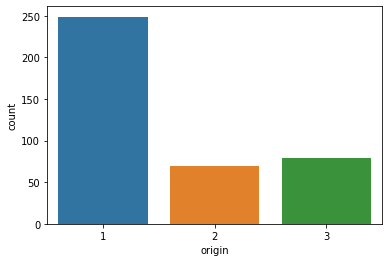

In [32]:
sns.countplot(x=df["origin"])

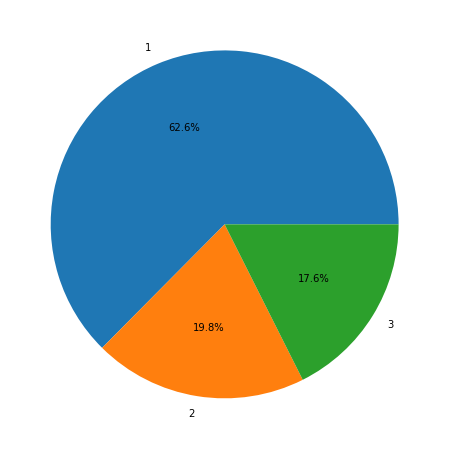

In [33]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.pie(df["origin"].value_counts(), labels = ["1","2","3"], autopct='%1.1f%%')
plt.show()

In [34]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

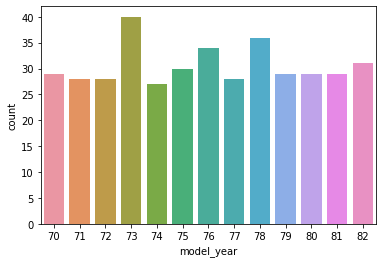

In [35]:
sns.countplot(x=df["model_year"])

In [36]:
labels = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]

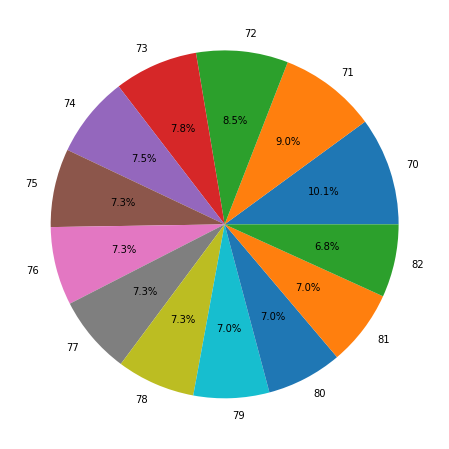

In [37]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.pie(df["model_year"].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

In [38]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

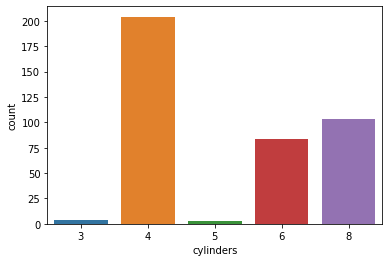

In [39]:
sns.countplot(x=df["cylinders"])
plt.show()

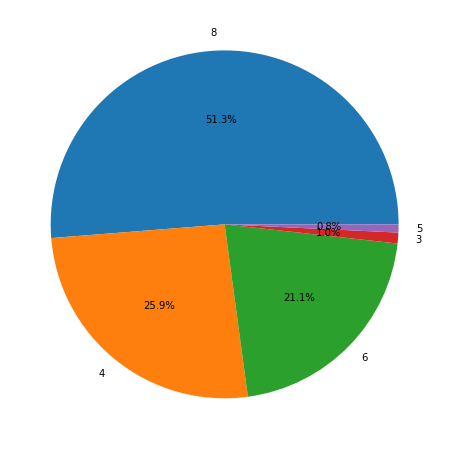

In [40]:
labels = [8, 4, 6, 3, 5]
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.pie(df["cylinders"].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

## Explorasi data numerik

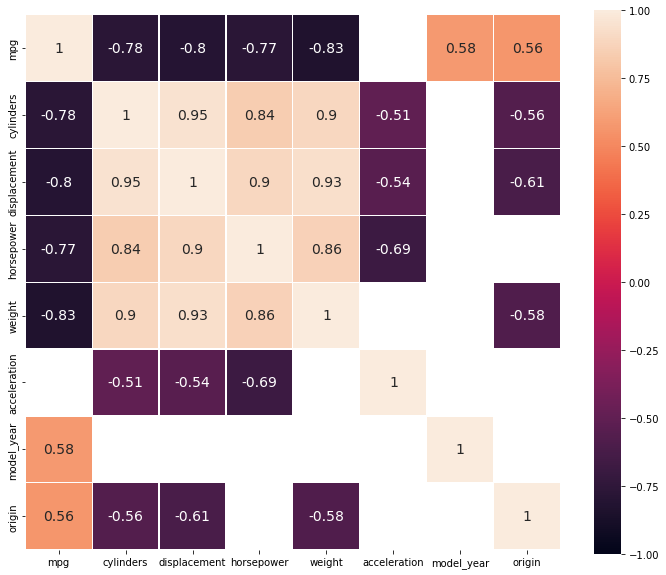

In [41]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)],vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True,
            annot_kws={"size":14},square=True)
plt.show()

In [42]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [43]:
col_numeric = ["mpg", "displacement", "horsepower", "weight", "acceleration"]

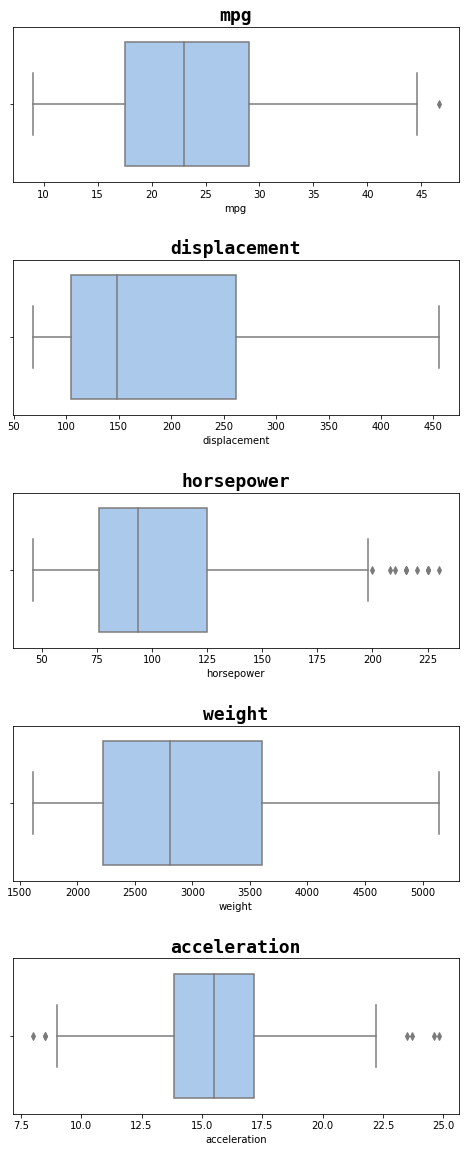

In [44]:
fig, ax = plt.subplots(5, 1, figsize = (8, 20))

for i, col in enumerate(col_numeric):
    plt.subplots_adjust(hspace=0.5)
    g = sns.boxplot(data = df, x = col, ax = ax[i], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")
plt.show()

dapat dilihat bahwa beberapa kolom yang memiliki outlier adalah kolom mpg, horsepower, dan acceleration. Karena outliers bukan merupakan noice dari data, maka outliers tersebut tidak perlu dihapus.

### Density plot

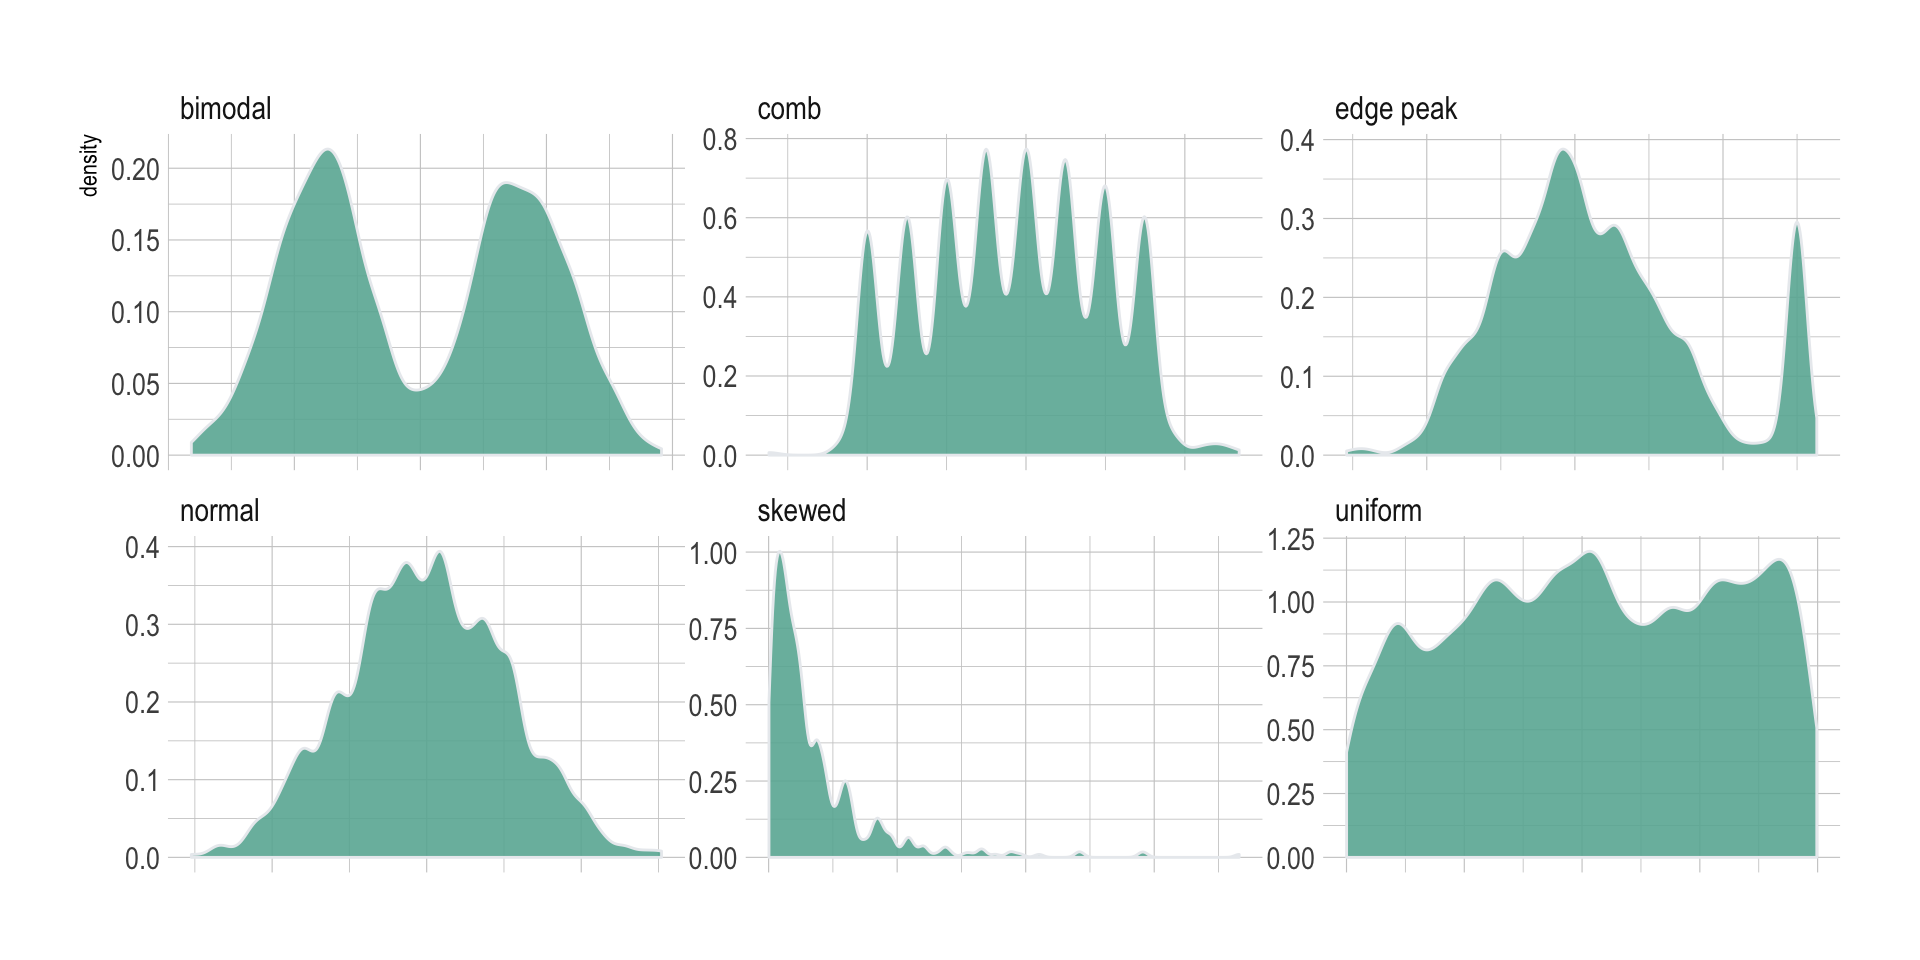

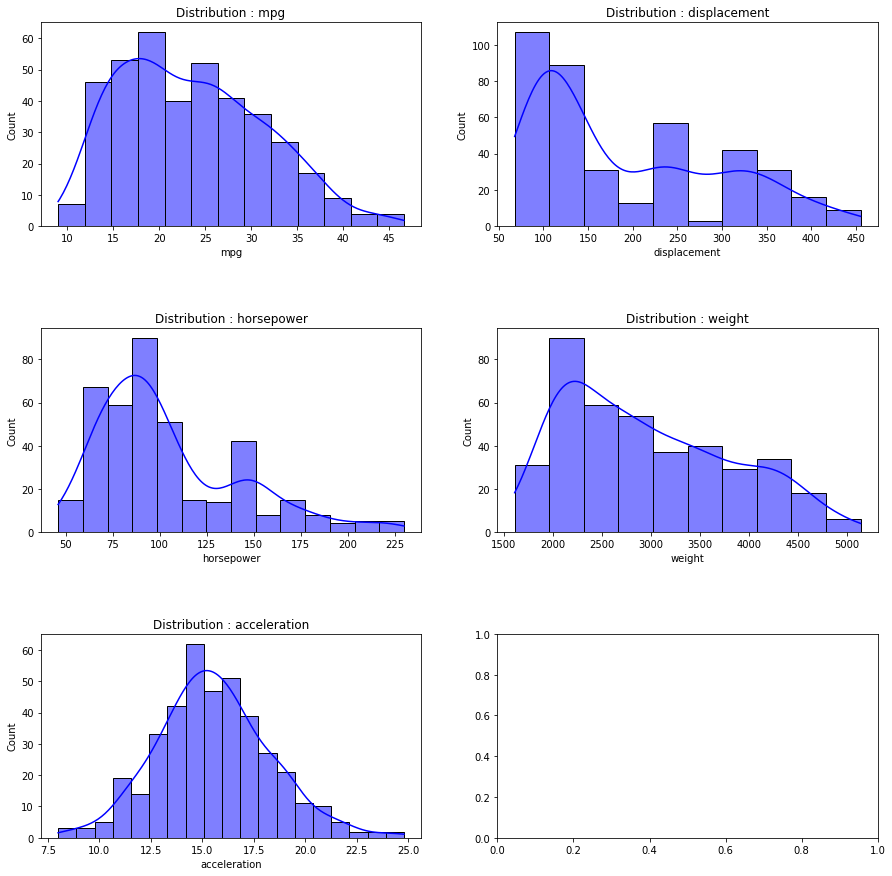

In [45]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))


for i in range(len(col_numeric)):
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(3,2,i+1)
    sns.histplot(df[col_numeric[i]],color = 'b',kde=True)
    title = 'Distribution : ' + col_numeric[i]
    plt.title(title)
plt.show()

* mpg, acceleration: normal
* displacement, horsepower, weight: right-skewed

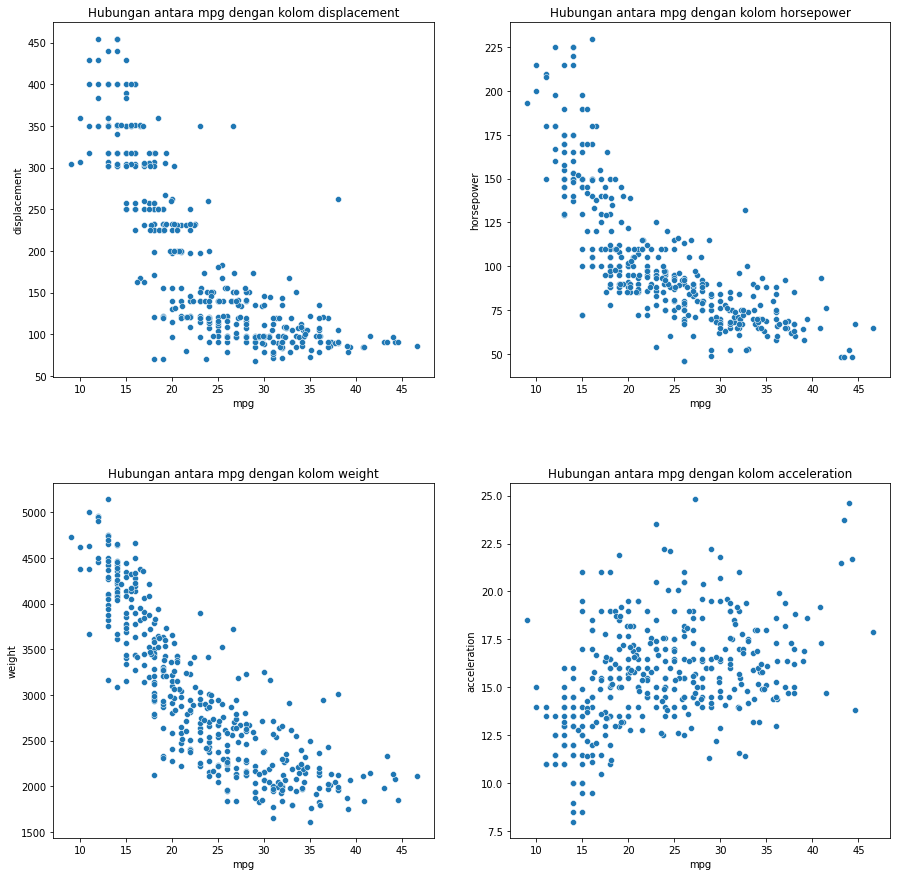

In [47]:
colm = ["displacement", "horsepower", "weight", "acceleration"]
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))

for i in range(len(colm)):
  plt.subplot(2,2,i+1)
  plt.subplots_adjust(hspace=0.3)
  sns.scatterplot(data = df,x="mpg",y=colm[i],palette = 'pastel',alpha=1)
  title = "Hubungan antara mpg dengan kolom " + colm[i]
  plt.title(title)
plt.show()

Terdapat korelasi yang negatif antara kolom mpg, dengan semua kolom numerik kecuali acceleration

## Eksplorasi antara kategorikal dan numerik

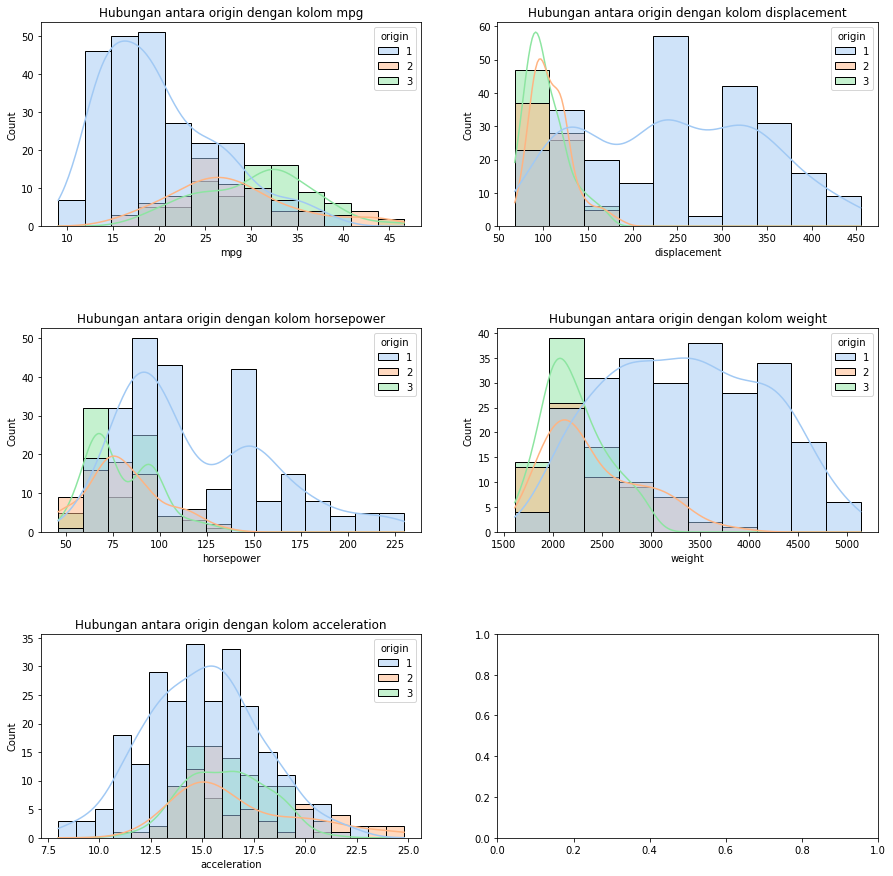

In [48]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

for i in range(len(col_numeric)):
  plt.subplot(3,2,i+1)
  plt.subplots_adjust(hspace=0.5)
  sns.histplot(data = df,x=df[col_numeric[i]],palette = 'pastel',kde=True,hue="origin")
  title = "Hubungan antara origin dengan kolom " + col_numeric[i]
  plt.title(title)
plt.show()

* record origin 1 memiliki mpg yang kecil, displacement yang besar, horsepower dan weight daripada origin 2 dan 3
* origin 1 terdistribusi seragam pada weight dan displacement
* Distribusi untuk origin 2 dan 3 relatif sama
  * mpg, weight: normal
  * displacement: right-skewed
  * Pada horsepower, origin 2: bimodal, sementara origin 2 terdistribusi normal
* Semua origin berdistribusi normal pada kolom acceleration



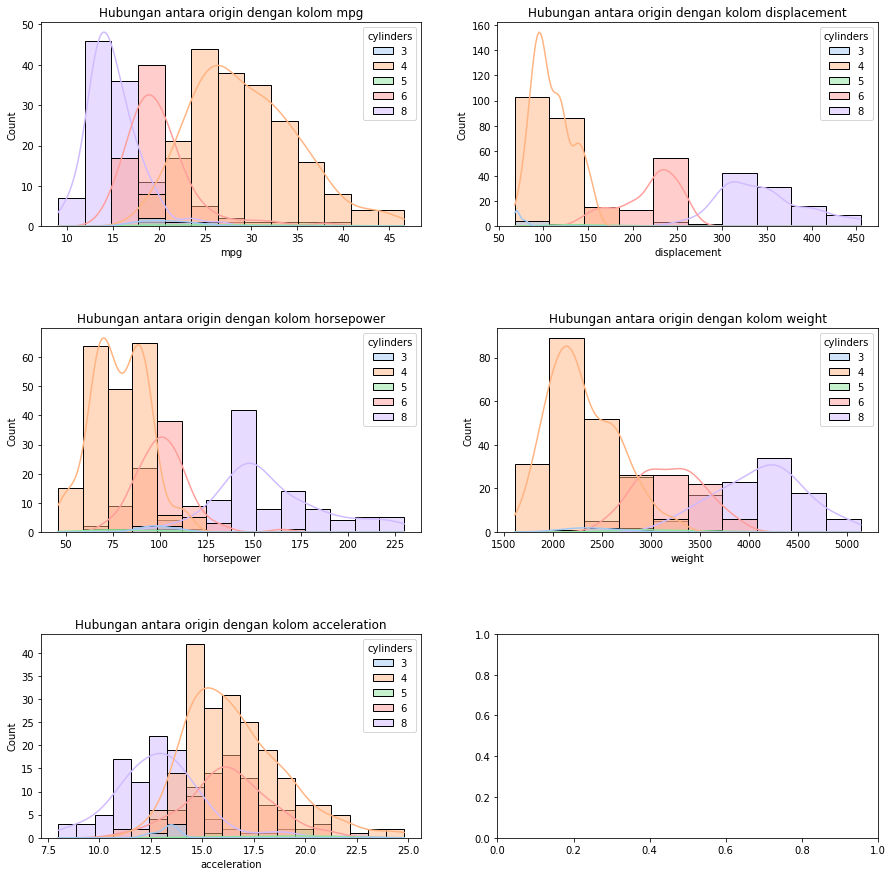

In [49]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

for i in range(len(col_numeric)):
  plt.subplot(3,2,i+1)
  plt.subplots_adjust(hspace=0.5)
  sns.histplot(data = df,x=df[col_numeric[i]],palette = 'pastel',kde=True,hue="cylinders")
  title = "Hubungan antara origin dengan kolom " + col_numeric[i]
  plt.title(title)
plt.show()

* cylinders 4, 6, dan 8 terdistribusi normal di mpg, weight, acceleration

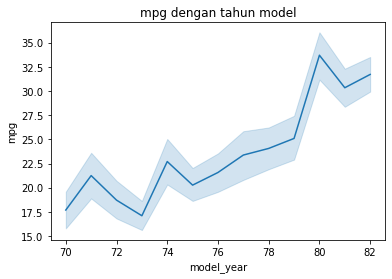

In [50]:
plt.title("mpg dengan tahun model")
sns.lineplot(data = df, x="model_year",y="mpg")
plt.show()

Semakin tinggi model_year maka mpg-nya juga semakin meningkat

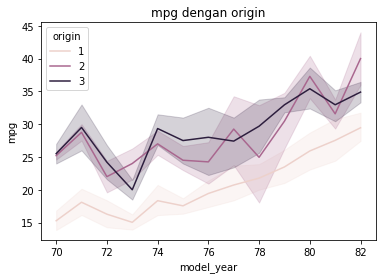

In [51]:
plt.title("mpg dengan origin")
sns.lineplot(data = df, x="model_year",y="mpg",hue="origin")
plt.show()

* mpg bertambah untuk setiap origin
* mpg origin 1 selalu di bawah origin 2 dan 3

## Menghitung outliers

In [52]:
df[col_numeric].describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.304020,2970.424623,15.568090
std,7.815984,104.269838,38.222625,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [53]:
Q1 = df[col_numeric].quantile(0.25)
Q3 = df[col_numeric].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filt = ((df[col_numeric] < (lower_bound)) | (df[col_numeric] > (upper_bound)))
filt.sum()

mpg              1
displacement     0
horsepower      11
weight           0
acceleration     7
dtype: int64

In [54]:
df.loc[filt["mpg"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


dapat dilihat bahwa value outliers di sini wajar sebab jika dilihat antara korelasi tiap variabel, mpg sangat berbanding terbalik dengan jumlah cylinders, displacement, horsepower, dan weightnya. sementara untuk record ke-322 ini, nilai dari kolom-kolom tersebut merupakan nilai yang sangat minimum.

In [55]:
df.loc[filt["acceleration"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71.0,3190,24.8,79,2,peugeot 504
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup


pada kasus di atas, ini juga bukan merupakan noice outliers karena masih berkorelasi dengan kolom-kolom yang mempengaruhi nilai acceleration, yaitu cylinders, displacement, dan horsepower.

In [56]:
df.loc[filt["horsepower"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom


pada kasus di atas, nilai dari horsepowernya juga sangat mungkin, karena cylindersnya bernilai sangat besar, yaitu 8.

In [57]:
# persentase outliers
filt = ((df[col_numeric] < (lower_bound)) | (df[col_numeric] > (upper_bound)))
filt = filt/len(df[col_numeric])*100
filt.sum()

mpg             0.251256
displacement    0.000000
horsepower      2.763819
weight          0.000000
acceleration    1.758794
dtype: float64

## Data transformation

Di sini transformasi data kita menggunakan scaling data

In [58]:
df.drop('car_name', axis=1, inplace=True)

In [59]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [60]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [61]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
minMax_df = pd.DataFrame(d, columns=names)
minMax_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


# Model

In [62]:
df_model = minMax_df.copy()

In [63]:
y = df_model["mpg"]
df_model.drop(['mpg'], axis=1, inplace=True)

In [64]:
y

0      0.239362
1      0.159574
2      0.239362
3      0.186170
4      0.212766
         ...   
393    0.478723
394    0.930851
395    0.611702
396    0.505319
397    0.585106
Name: mpg, Length: 398, dtype: float64

In [65]:
df_model

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
393,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.33, random_state=42)

In [67]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
324,0.2,0.043928,0.103261,0.140913,0.666667,0.833333,1.0
176,0.6,0.423773,0.239130,0.453076,0.535714,0.416667,0.0
119,0.2,0.118863,0.244565,0.274738,0.357143,0.250000,0.5
192,0.6,0.470284,0.320652,0.493337,0.386905,0.500000,0.0
202,0.6,0.490956,0.266304,0.447973,0.583333,0.500000,0.0
...,...,...,...,...,...,...,...
71,0.0,0.005168,0.277174,0.203289,0.327381,0.166667,1.0
106,1.0,0.728682,0.728261,0.818259,0.267857,0.250000,0.0
270,0.2,0.170543,0.266304,0.255741,0.404762,0.666667,1.0
348,0.2,0.054264,0.086957,0.123901,0.553571,0.916667,1.0


In [68]:
y_train

324    0.845745
176    0.265957
119    0.292553
192    0.345745
202    0.226064
         ...   
71     0.265957
106    0.079787
270    0.321809
348    0.763298
102    0.452128
Name: mpg, Length: 266, dtype: float64

In [69]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
198,0.2,0.059432,0.038043,0.051602,0.559524,0.500000,1.0
396,0.2,0.134367,0.179348,0.286929,0.630952,1.000000,0.0
33,0.6,0.423773,0.293478,0.289481,0.297619,0.083333,0.0
208,1.0,0.645995,0.565217,0.659768,0.309524,0.500000,0.0
93,1.0,0.645995,0.565217,0.743975,0.386905,0.250000,0.0
...,...,...,...,...,...,...,...
392,0.2,0.214470,0.239130,0.379076,0.553571,1.000000,0.0
379,0.2,0.077519,0.130435,0.145166,0.553571,1.000000,0.0
358,0.2,0.134367,0.152174,0.289765,0.613095,0.916667,1.0
310,0.2,0.054264,0.076087,0.100652,0.642857,0.833333,1.0


In [70]:
y_test

198    0.638298
396    0.505319
33     0.265957
208    0.106383
93     0.132979
         ...   
392    0.478723
379    0.718085
358    0.601064
310    0.773936
145    0.611702
Name: mpg, Length: 132, dtype: float64

In [136]:
from sklearn.svm import SVR

In [74]:
reggr = BaggingRegressor(n_estimators=10, random_state=0).fit(X_train, y_train)

In [76]:
y_predict = reggr.predict(X_test)

In [79]:
reggr.score(X_test,y_test)

0.8611845797143266

# Eksperiment

In [80]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [129]:
def test_regression():
    hasil_arr = []
    grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]})

    for base_estimator in [None,
                           DummyRegressor(),
                           DecisionTreeRegressor(),
                           KNeighborsRegressor(),
                           SVR()]:
        for params in grid:
            para = []
            para.append(str(base_estimator))
            para_val = list(params.values())
            #print(para_val)
            for i in para_val:
              para.append(i)
            #para.append(para_val[0:])
            #para.append(list(params.values()))

            

            #hasil_arr.append(list(base_estimator,list(params)))
            #print(base_estimator)
            #print(params)
            reggr = BaggingRegressor(base_estimator=base_estimator,
                             random_state=0,
                             **params).fit(X_train, y_train)
            #print(reggr.score(X_test,y_test))
            para.append(reggr.score(X_test,y_test))
            hasil_arr.append(para)
    return hasil_arr

In [130]:
hasil_arr = test_regression()

In [131]:
print(hasil_arr)

[['None', True, True, 0.5, 0.5, 0.8684259738023419], ['None', True, True, 0.5, 1.0, 0.8684383067455249], ['None', True, True, 1.0, 0.5, 0.8775892692054654], ['None', True, True, 1.0, 1.0, 0.8587539979514255], ['None', True, False, 0.5, 0.5, 0.8673175931939298], ['None', True, False, 0.5, 1.0, 0.8655687245142566], ['None', True, False, 1.0, 0.5, 0.8734728089546016], ['None', True, False, 1.0, 1.0, 0.8611845797143266], ['None', False, True, 0.5, 0.5, 0.891864535408417], ['None', False, True, 0.5, 1.0, 0.8701600357960915], ['None', False, True, 1.0, 0.5, 0.8779313675603129], ['None', False, True, 1.0, 1.0, 0.8583349929486086], ['None', False, False, 0.5, 0.5, 0.8607643661153868], ['None', False, False, 0.5, 1.0, 0.8486181863530053], ['None', False, False, 1.0, 0.5, 0.8958288199585474], ['None', False, False, 1.0, 1.0, 0.7635096883006093], ['DummyRegressor()', True, True, 0.5, 0.5, -0.0010447617662163733], ['DummyRegressor()', True, True, 0.5, 1.0, -0.001470220584502524], ['DummyRegressor(

In [132]:
hasil = pd.DataFrame(hasil_arr, columns=["Base Estimator", "max_samples","max_features","bootstrap","bootstrap_features", "score"])

In [133]:
hasil

,Base Estimator,max_samples,max_features,bootstrap,bootstrap_features,score
0,None,True,True,0.5,0.5,0.868426
1,None,True,True,0.5,1.0,0.868438
2,None,True,True,1.0,0.5,0.877589
3,None,True,True,1.0,1.0,0.858754
4,None,True,False,0.5,0.5,0.867318
...,...,...,...,...,...,...
75,SVR(),False,True,1.0,1.0,0.908015
76,SVR(),False,False,0.5,0.5,0.875096
77,SVR(),False,False,0.5,1.0,0.889283
78,SVR(),False,False,1.0,0.5,0.908508


In [135]:
hasil.sort_values(by=["score"],ascending=False)

,Base Estimator,max_samples,max_features,bootstrap,bootstrap_features,score
71,SVR(),True,False,1.0,1.0,0.913433
79,SVR(),False,False,1.0,1.0,0.913136
78,SVR(),False,False,1.0,0.5,0.908508
75,SVR(),False,True,1.0,1.0,0.908015
74,SVR(),False,True,1.0,0.5,0.903865
...,...,...,...,...,...,...
29,DummyRegressor(),False,False,0.5,1.0,-0.007870
31,DummyRegressor(),False,False,1.0,1.0,-0.007870
30,DummyRegressor(),False,False,1.0,0.5,-0.008296
26,DummyRegressor(),False,True,1.0,0.5,-0.012188
